# Sourcing & Analyzing Time Series Data 
with dataset on NY houseowener rate from 1984-2018 published by the US census bureau 
# import libraries and preparations - 
including import of kaggle and kaggle api
download dataset fropm kaggle (the direct import from kaggle did not work and there was shortage in time, so I downloaded the dataset on my computer and took it out of my project files

In [1]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.model_list_cli()

Next Page Token = CfDJ8NfOyeaVXHJCjrjiquH0Of6jeGT_sVU2t6txvCqgw9ExbhfrZ2Dm1bs10oH-jrv-PbsxCV25eHRywx4U56p9xI0
    id  ref                                  title                     subtitle                                                                                                                                                                                                                                                  author          
------  -----------------------------------  ------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------------  
456721  qwen-lm/qwen-3-vl                    Qwen 3 VL                 Qwen3-VL is the most powerful vision-language model in its series, offering significant upgrades in visual perception, reasoning, and context u

In [2]:
import kaggle
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html


In [3]:
path=r'/Users/ru/Desktop/CF/06_Achievement 6_VE'


In [4]:
df = pd.read_csv(os.path.join(path,'02_06_Data','2.1_06_Original Data',
                                 'archive','NYHOWN.csv'))

In [5]:
# Check dataset
df.head(5)

,realtime_start,realtime_end,date,value
0,2019-12-06,2019-12-06,1984-01-01,51.1
1,2019-12-06,2019-12-06,1985-01-01,50.3
2,2019-12-06,2019-12-06,1986-01-01,51.3
3,2019-12-06,2019-12-06,1987-01-01,52.0
4,2019-12-06,2019-12-06,1988-01-01,50.7


In [6]:
df.shape

(35, 4)

In [7]:
df.columns

Index(['realtime_start', 'realtime_end', 'date', 'value'], dtype='object')

In [8]:
type(df)

pandas.core.frame.DataFrame

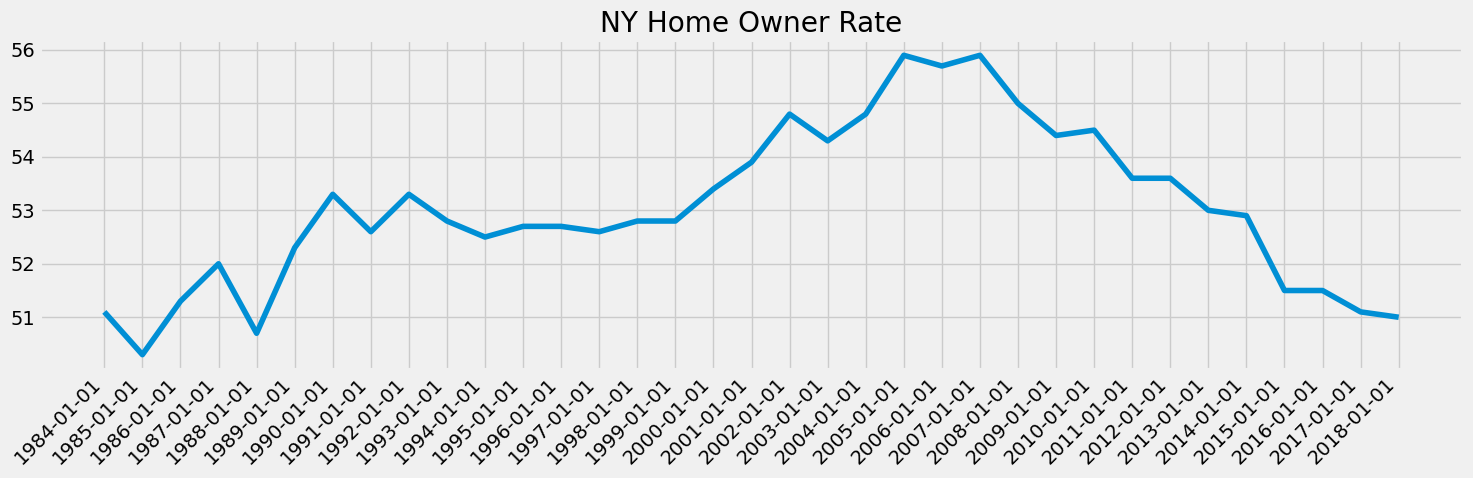

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df['date'], df['value'])

## Rotate x-axis labels
plt.xticks(rotation=45, ha='right') # rotate dates at the x axis

plt.title('NY Home Owner Rate')
plt.tight_layout()
plt.show()

INTERPRETATION
tha graph shows ups and downs with a overall upwardtrend until the finance crisis in 2008 and a following downward trend

In [10]:
# check of missing values - no results
df.isnull().sum() 

realtime_start    0
realtime_end      0
date              0
value             0
dtype: int64

In [11]:
# check of dublicates - no results
dups = df.duplicated()
dups.sum()

0

In [12]:
# check of datatypes - 
df.dtypes

realtime_start     object
realtime_end       object
date               object
value             float64
dtype: object

In [13]:
# necessity to change date column (object) in integer
df['date_int'] = df['date'].astype(str).str.replace('-', '').astype(int)

In [14]:
# convert date (YYYYMMDD) into datetime 
import statsmodels.api as sm
df['date'] = pd.to_datetime(df['date_int'], format='%Y%m%d')



In [15]:
df.head()

,realtime_start,realtime_end,date,value,date_int
0,2019-12-06,2019-12-06,1984-01-01,51.1,19840101
1,2019-12-06,2019-12-06,1985-01-01,50.3,19850101
2,2019-12-06,2019-12-06,1986-01-01,51.3,19860101
3,2019-12-06,2019-12-06,1987-01-01,52.0,19870101
4,2019-12-06,2019-12-06,1988-01-01,50.7,19880101


In [16]:
# set date as index and create a new dataframe with datetime as indext and value
from datetime import datetime

df['datetime'] = pd.to_datetime(df['date']) # Create a datetime column from "Date.""
df_ts = df.set_index('datetime') # Set the datetime as the index of the dataframe.
df_ts.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_ts.head()

,realtime_start,realtime_end,value,date_int
datetime,,,,
1984-01-01,2019-12-06,2019-12-06,51.1,19840101
1985-01-01,2019-12-06,2019-12-06,50.3,19850101
1986-01-01,2019-12-06,2019-12-06,51.3,19860101
1987-01-01,2019-12-06,2019-12-06,52.0,19870101
1988-01-01,2019-12-06,2019-12-06,50.7,19880101


Reflections on a Subset: there is no necessity to reduce the data in terms of time (it lasts from 1984 to 2018 which is an intersting timespan) But it is necessarry to change the datatype and get rid of the unnecessary coulumns. Therefor a new datafram (df_ts) is created

In [17]:
# drop unnecessary columns
df_ts.drop(['realtime_start', 'realtime_end', 'date_int'], axis=1, inplace=True)

In [18]:
# check
df_ts.head()

,value
datetime,
1984-01-01,51.1
1985-01-01,50.3
1986-01-01,51.3
1987-01-01,52.0
1988-01-01,50.7


In [19]:
df_ts.columns

Index(['value'], dtype='object')

# Decompose timeseries

In [20]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_ts, model='additive')

In [21]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

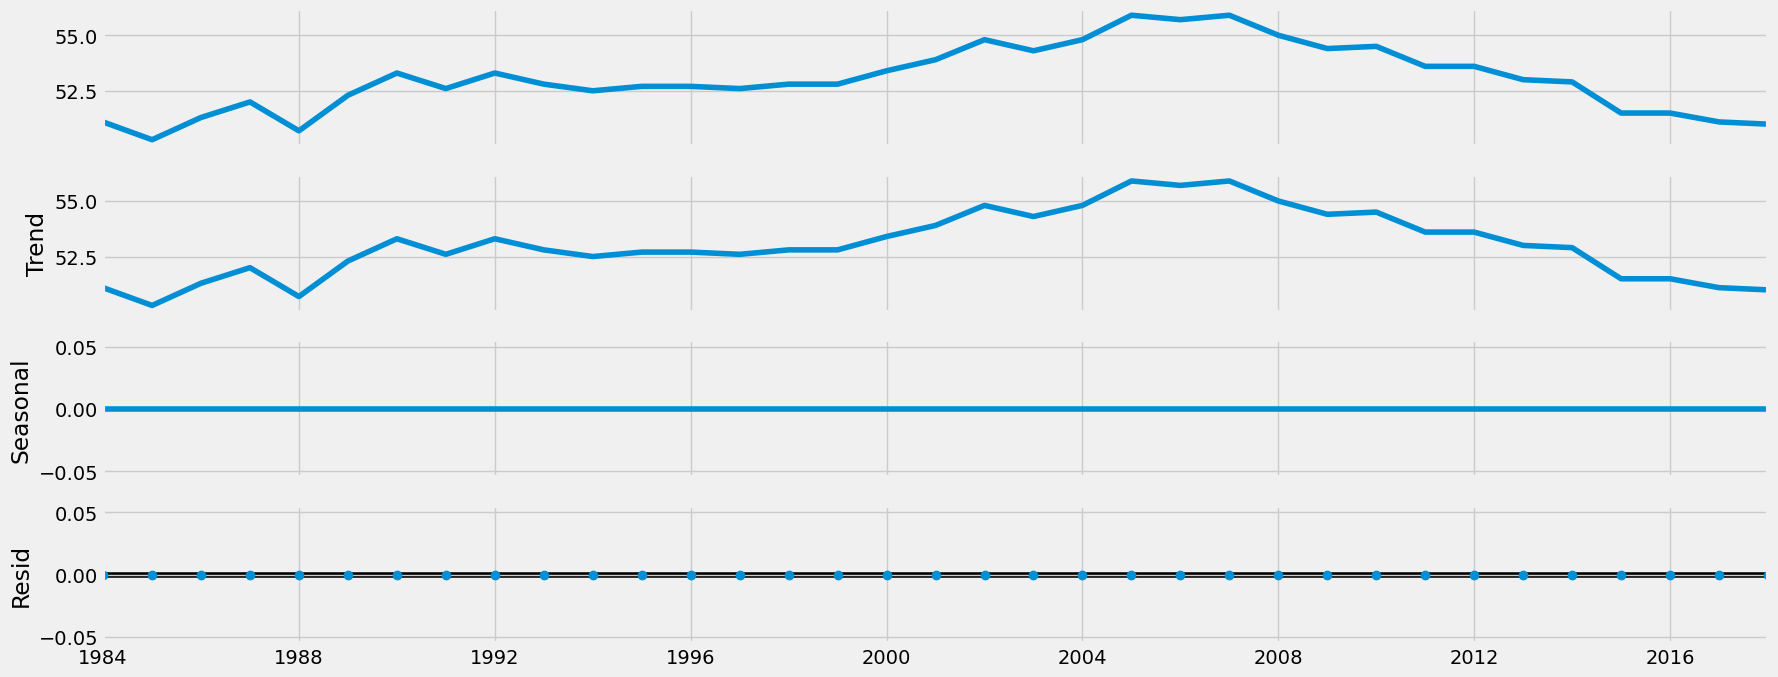

In [33]:
# Plot the separate components

decomposition.plot()
plt.show()

INTERPRETATION
the decomposition shows no seasonality (which makes since there is one data-entry per year) and small upward trend until the year 2008 and than a small downwardtrend - I would assume that it is non stationary data so far.

# perform dickey fuller test

In [23]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_ts['value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.735931
p-value                         0.412701
Number of Lags Used             5.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


INTERPRETATION: 

the test statistic of -1.735 is larger then the critical value of 5%  (which is - 2.97)
so I cant reject the null hypothesis, so the data is non-stationary
       



# autocorrelation testing

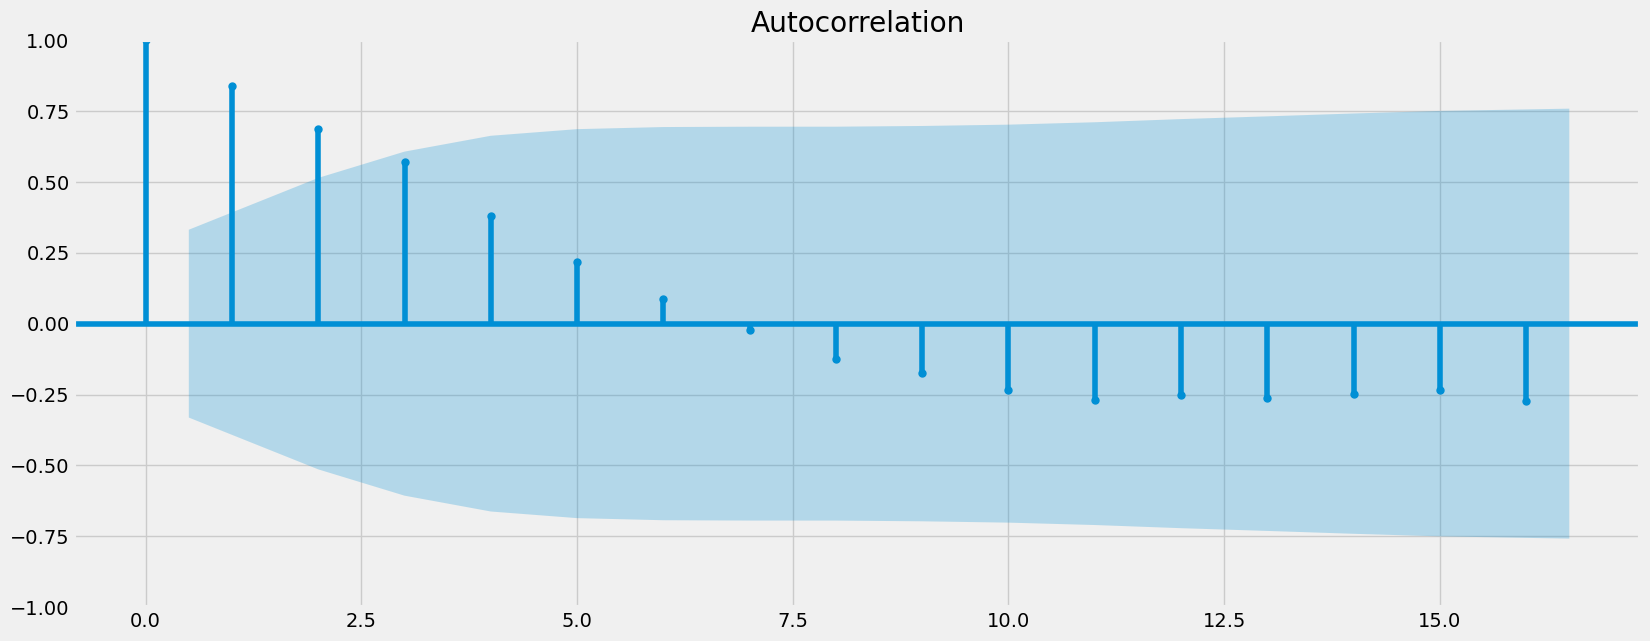

In [24]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_ts)
plt.show()

# transform non stationary data data into stationary data

In [25]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
df_diff = df_ts - df_ts.shift(1) 


In [26]:
# Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.
df_diff.dropna(inplace = True) 

In [27]:
df_diff.head()

,value
datetime,
1985-01-01,-0.8
1986-01-01,1.0
1987-01-01,0.7
1988-01-01,-1.3
1989-01-01,1.6


In [28]:
df_diff.columns

Index(['value'], dtype='object')

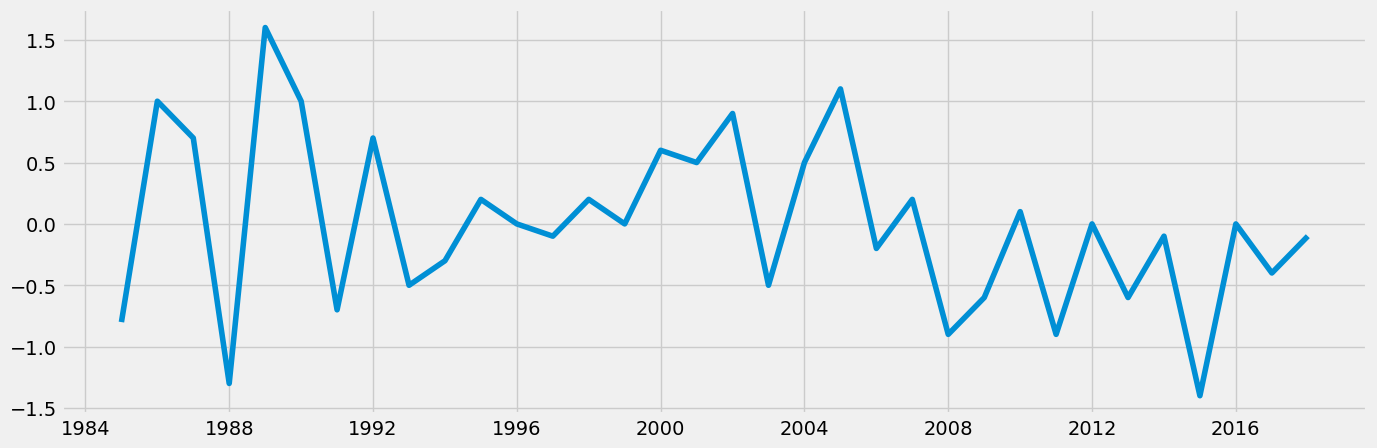

In [29]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

significant difference in the shape of slop compared to the first plot

In [30]:
# perform a second dickey fuller test to confirm what is allready visible in the graph
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.943672
p-value                         0.001736
Number of Lags Used             1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


INTERPRETATION
the test statistic of -3.94 is smaller then the critical value of 5%  (which is - 2.95) and even tha critical value of 1% (-3.65)
the result is clear: I can reject the null hypothesis, the data is transformed into stationary data.
       

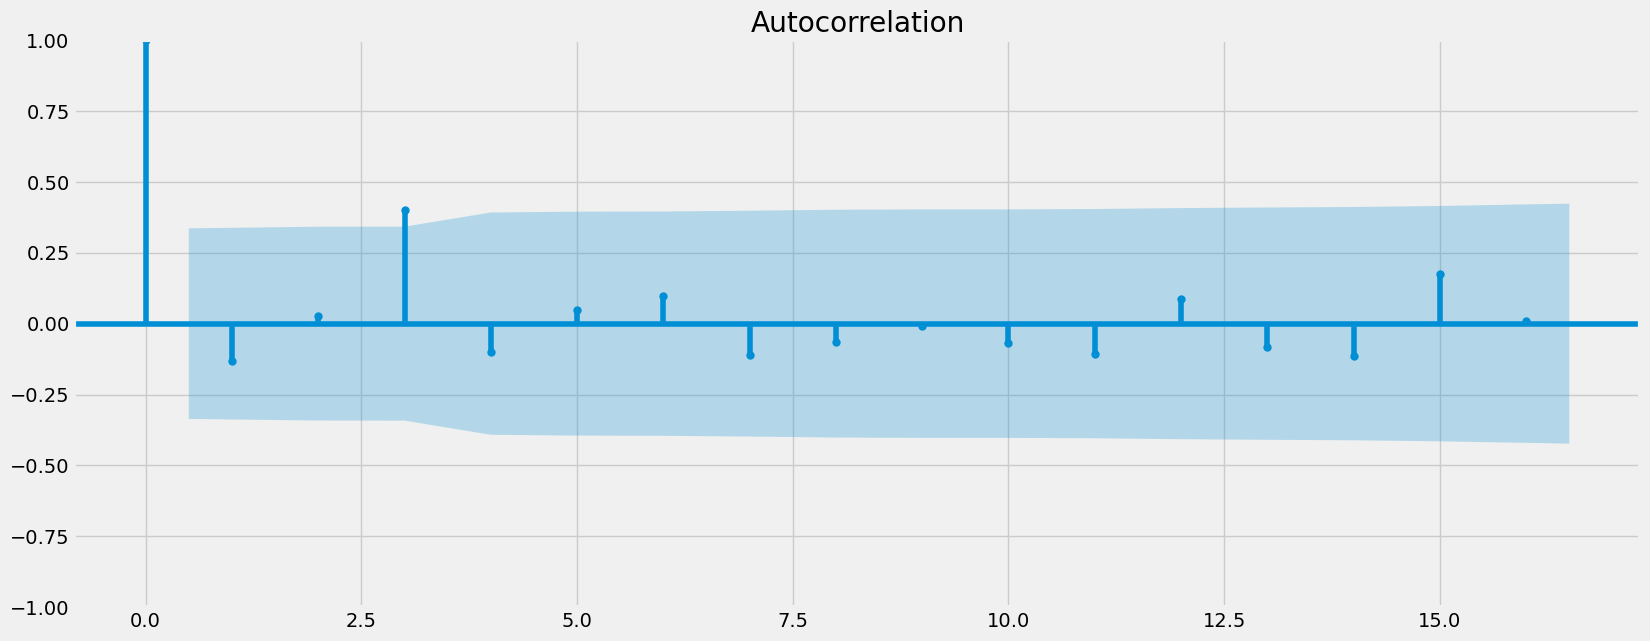

In [31]:
# confirm the results with another visualtzation: plot of autocorrelation of the transformed dataset

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_diff)
plt.show()